In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [4]:
df

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782
...,...,...,...,...,...,...,...,...
32160,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
32161,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076
32162,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,6.241812
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,7.940428


In [5]:
fin_df = pd.get_dummies(df, columns=['name_of_drug', 'use_case_for_drug'])

In [6]:
fin_df.head()

,patient_id,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,name_of_drug_Abacavir / dolutegravir / lamivudine,name_of_drug_Abatacept,name_of_drug_Abilify,name_of_drug_Abilify Discmelt,...,use_case_for_drug_min / pioglitazone),use_case_for_drug_min / rosiglitazone),use_case_for_drug_min / saxagliptin),use_case_for_drug_min / sitagliptin),use_case_for_drug_min),use_case_for_drug_moterol / mometasone),use_case_for_drug_moterol),use_case_for_drug_mulation) (phenylephrine),use_case_for_drug_von Willebrand's Disease,use_case_for_drug_zen Shoulde
0,206461,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,95260,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92703,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35696,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,155963,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [119]:
from sklearn.preprocessing import LabelEncoder, Normalizer

In [9]:
la = LabelEncoder()
la2 = LabelEncoder()

In [51]:
total = df.append(test)
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod,day,month,year
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,NaN,NaN,NaN,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,NaN,NaN,NaN,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,NaN,NaN,NaN,NaN,NaN
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,NaN,NaN,NaN,NaN,NaN
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,NaN,NaN,NaN,NaN,NaN


In [52]:
total.tail()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod,day,month,year
10755,151266,Chantix,Smoking Cessation,"""I took chantix a little over a month. It made...",1,2017-11-11 00:00:00,2,NaN,565.0,431.0,11.0,11.0,2017.0
10756,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,2014-09-30 00:00:00,18,NaN,398.0,175.0,30.0,9.0,2014.0
10757,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,2014-09-13 00:00:00,43,NaN,128.0,2041.0,13.0,9.0,2014.0
10758,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,2010-11-15 00:00:00,7,NaN,114.0,1206.0,15.0,11.0,2010.0
10759,113712,Arthrotec,Sciatica,"""It works!!!""",9,2009-09-13 00:00:00,46,NaN,545.0,179.0,13.0,9.0,2009.0


In [53]:
total['enc_ucd'] = la.fit_transform(total['use_case_for_drug'])

In [54]:
total['enc_nod'] = la2.fit_transform(total['name_of_drug'])

In [55]:
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod,day,month,year
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,351,2222,NaN,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,42,980,NaN,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,114,1285,NaN,NaN,NaN
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,432,352,NaN,NaN,NaN
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,109,461,NaN,NaN,NaN


In [56]:
total['drug_approved_by_UIC'] = pd.to_datetime(total['drug_approved_by_UIC'])
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod,day,month,year
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,351,2222,NaN,NaN,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,42,980,NaN,NaN,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,114,1285,NaN,NaN,NaN
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,432,352,NaN,NaN,NaN
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,109,461,NaN,NaN,NaN


In [57]:
total['day'] = total['drug_approved_by_UIC'].apply(lambda x: x.day)
total['month'] = total['drug_approved_by_UIC'].apply(lambda x: x.month)
total['year'] = total['drug_approved_by_UIC'].apply(lambda x: x.year)

In [58]:
train = total[~total['base_score'].isna()].reset_index(drop=True)
test = total[total['base_score'].isna()].reset_index(drop=True)

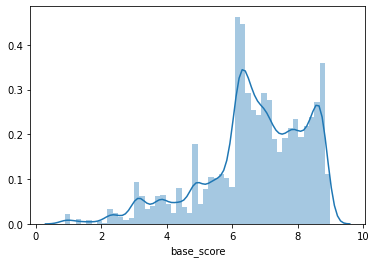

In [59]:
sns.distplot((train['base_score']))

In [120]:
std = Normalizer()

In [149]:
X, y = (np.array(train[['enc_nod', 'enc_ucd', 'day', 'month', 'year', 'effectiveness_rating','number_of_times_prescribed']])), (np.array(train['base_score']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [150]:
from sklearn.ensemble import RandomForestRegressor
import catboost
import lightgbm
import xgboost
import numpy as np

In [151]:
rf = RandomForestRegressor()
cat = catboost.CatBoostRegressor()
cat2 = catboost.CatBoostRegressor()
lgt = lightgbm.LGBMRegressor()

In [152]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21550, 7), (21550,), (10615, 7), (10615,))

In [153]:
rf.fit(X_train, y_train)
cat.fit(X_train, y_train)
lgt.fit(X_train, y_train)

Learning rate set to 0.067415
0:	learn: 1.5413855	total: 11.4ms	remaining: 11.4s
1:	learn: 1.4888269	total: 15.6ms	remaining: 7.78s
2:	learn: 1.4381127	total: 20ms	remaining: 6.63s
3:	learn: 1.3963985	total: 24.1ms	remaining: 5.99s
4:	learn: 1.3544235	total: 28.1ms	remaining: 5.59s
5:	learn: 1.3201395	total: 33.2ms	remaining: 5.5s
6:	learn: 1.2876702	total: 37.2ms	remaining: 5.27s
7:	learn: 1.2563403	total: 41.1ms	remaining: 5.1s
8:	learn: 1.2237652	total: 44.9ms	remaining: 4.95s
9:	learn: 1.1988440	total: 49ms	remaining: 4.85s
10:	learn: 1.1721732	total: 53ms	remaining: 4.76s
11:	learn: 1.1538683	total: 56.9ms	remaining: 4.68s
12:	learn: 1.1342009	total: 62.8ms	remaining: 4.77s
13:	learn: 1.1136189	total: 66.8ms	remaining: 4.71s
14:	learn: 1.0979919	total: 71.3ms	remaining: 4.68s
15:	learn: 1.0833164	total: 75.5ms	remaining: 4.64s
16:	learn: 1.0683427	total: 79.6ms	remaining: 4.6s
17:	learn: 1.0549841	total: 83.6ms	remaining: 4.56s
18:	learn: 1.0439802	total: 87.6ms	remaining: 4.52s
1

162:	learn: 0.4506880	total: 832ms	remaining: 4.27s
163:	learn: 0.4478963	total: 837ms	remaining: 4.27s
164:	learn: 0.4461127	total: 842ms	remaining: 4.26s
165:	learn: 0.4453424	total: 849ms	remaining: 4.27s
166:	learn: 0.4433936	total: 870ms	remaining: 4.34s
167:	learn: 0.4417066	total: 879ms	remaining: 4.35s
168:	learn: 0.4407381	total: 884ms	remaining: 4.34s
169:	learn: 0.4392807	total: 889ms	remaining: 4.34s
170:	learn: 0.4377832	total: 896ms	remaining: 4.34s
171:	learn: 0.4360118	total: 901ms	remaining: 4.33s
172:	learn: 0.4348936	total: 906ms	remaining: 4.33s
173:	learn: 0.4335760	total: 911ms	remaining: 4.32s
174:	learn: 0.4331509	total: 916ms	remaining: 4.32s
175:	learn: 0.4327715	total: 924ms	remaining: 4.33s
176:	learn: 0.4303879	total: 932ms	remaining: 4.33s
177:	learn: 0.4295525	total: 939ms	remaining: 4.34s
178:	learn: 0.4292604	total: 944ms	remaining: 4.33s
179:	learn: 0.4265252	total: 948ms	remaining: 4.32s
180:	learn: 0.4257079	total: 953ms	remaining: 4.31s
181:	learn: 

344:	learn: 0.2705112	total: 2s	remaining: 3.8s
345:	learn: 0.2697451	total: 2.01s	remaining: 3.79s
346:	learn: 0.2689063	total: 2.01s	remaining: 3.79s
347:	learn: 0.2679970	total: 2.02s	remaining: 3.77s
348:	learn: 0.2672226	total: 2.02s	remaining: 3.77s
349:	learn: 0.2669394	total: 2.02s	remaining: 3.76s
350:	learn: 0.2667090	total: 2.03s	remaining: 3.75s
351:	learn: 0.2663364	total: 2.03s	remaining: 3.74s
352:	learn: 0.2662005	total: 2.04s	remaining: 3.74s
353:	learn: 0.2652465	total: 2.04s	remaining: 3.73s
354:	learn: 0.2645644	total: 2.05s	remaining: 3.73s
355:	learn: 0.2639301	total: 2.06s	remaining: 3.72s
356:	learn: 0.2632605	total: 2.06s	remaining: 3.72s
357:	learn: 0.2625416	total: 2.07s	remaining: 3.71s
358:	learn: 0.2623567	total: 2.08s	remaining: 3.71s
359:	learn: 0.2621622	total: 2.08s	remaining: 3.7s
360:	learn: 0.2620677	total: 2.09s	remaining: 3.69s
361:	learn: 0.2618940	total: 2.09s	remaining: 3.68s
362:	learn: 0.2612720	total: 2.1s	remaining: 3.68s
363:	learn: 0.2605

528:	learn: 0.1928884	total: 3s	remaining: 2.67s
529:	learn: 0.1926889	total: 3s	remaining: 2.66s
530:	learn: 0.1922718	total: 3.01s	remaining: 2.66s
531:	learn: 0.1917743	total: 3.01s	remaining: 2.65s
532:	learn: 0.1916857	total: 3.02s	remaining: 2.64s
533:	learn: 0.1913792	total: 3.02s	remaining: 2.64s
534:	learn: 0.1912691	total: 3.03s	remaining: 2.63s
535:	learn: 0.1909067	total: 3.03s	remaining: 2.63s
536:	learn: 0.1907827	total: 3.04s	remaining: 2.62s
537:	learn: 0.1904587	total: 3.05s	remaining: 2.62s
538:	learn: 0.1901883	total: 3.05s	remaining: 2.61s
539:	learn: 0.1899210	total: 3.06s	remaining: 2.61s
540:	learn: 0.1894404	total: 3.06s	remaining: 2.6s
541:	learn: 0.1891722	total: 3.07s	remaining: 2.59s
542:	learn: 0.1889192	total: 3.08s	remaining: 2.59s
543:	learn: 0.1886929	total: 3.08s	remaining: 2.58s
544:	learn: 0.1885453	total: 3.08s	remaining: 2.58s
545:	learn: 0.1881668	total: 3.09s	remaining: 2.57s
546:	learn: 0.1877730	total: 3.1s	remaining: 2.56s
547:	learn: 0.187467

712:	learn: 0.1489343	total: 3.99s	remaining: 1.61s
713:	learn: 0.1488014	total: 4s	remaining: 1.6s
714:	learn: 0.1486911	total: 4s	remaining: 1.59s
715:	learn: 0.1485159	total: 4.01s	remaining: 1.59s
716:	learn: 0.1483375	total: 4.01s	remaining: 1.58s
717:	learn: 0.1481832	total: 4.02s	remaining: 1.58s
718:	learn: 0.1481329	total: 4.02s	remaining: 1.57s
719:	learn: 0.1480217	total: 4.03s	remaining: 1.57s
720:	learn: 0.1477913	total: 4.04s	remaining: 1.56s
721:	learn: 0.1477209	total: 4.04s	remaining: 1.55s
722:	learn: 0.1476077	total: 4.04s	remaining: 1.55s
723:	learn: 0.1474200	total: 4.05s	remaining: 1.54s
724:	learn: 0.1471766	total: 4.05s	remaining: 1.54s
725:	learn: 0.1469487	total: 4.06s	remaining: 1.53s
726:	learn: 0.1467770	total: 4.06s	remaining: 1.53s
727:	learn: 0.1467180	total: 4.07s	remaining: 1.52s
728:	learn: 0.1464402	total: 4.07s	remaining: 1.51s
729:	learn: 0.1462417	total: 4.08s	remaining: 1.51s
730:	learn: 0.1461661	total: 4.08s	remaining: 1.5s
731:	learn: 0.146114

884:	learn: 0.1241957	total: 4.83s	remaining: 627ms
885:	learn: 0.1239532	total: 4.83s	remaining: 622ms
886:	learn: 0.1237788	total: 4.84s	remaining: 616ms
887:	learn: 0.1236058	total: 4.84s	remaining: 611ms
888:	learn: 0.1234657	total: 4.85s	remaining: 606ms
889:	learn: 0.1234332	total: 4.85s	remaining: 600ms
890:	learn: 0.1233172	total: 4.86s	remaining: 595ms
891:	learn: 0.1231858	total: 4.87s	remaining: 589ms
892:	learn: 0.1230796	total: 4.87s	remaining: 584ms
893:	learn: 0.1229433	total: 4.88s	remaining: 579ms
894:	learn: 0.1228369	total: 4.88s	remaining: 573ms
895:	learn: 0.1226511	total: 4.89s	remaining: 568ms
896:	learn: 0.1225977	total: 4.89s	remaining: 562ms
897:	learn: 0.1225366	total: 4.9s	remaining: 557ms
898:	learn: 0.1224697	total: 4.9s	remaining: 551ms
899:	learn: 0.1224032	total: 4.91s	remaining: 545ms
900:	learn: 0.1222976	total: 4.91s	remaining: 540ms
901:	learn: 0.1222276	total: 4.92s	remaining: 534ms
902:	learn: 0.1221044	total: 4.92s	remaining: 529ms
903:	learn: 0.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [157]:
rf_test = (rf.predict((X_test)))

In [158]:
cat_test = (cat.predict((X_test)))

In [159]:
lgt_test = (lgt.predict((X_test)))

In [160]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [161]:
def scoring(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    score = 100*max(0, 1-rmse)
    return score

In [162]:
X_test

array([[2194,  158,   11, ..., 2015,    8,   30],
       [1962,  393,   14, ..., 2008,    9,  113],
       [1991,  268,   17, ..., 2017,    5,    3],
       ...,
       [1240,  292,    9, ..., 2014,    1,   64],
       [1258,   79,   17, ..., 2014,   10,   60],
       [1959,  447,   31, ..., 2016,   10,   37]], dtype=int64)

In [163]:
scoring(y_test, rf_test)

73.16234417939931

In [164]:
scoring(y_test, cat_test)

85.21070441034898

In [165]:
scoring(y_test, lgt_test)

79.81605101682044

In [83]:
test_pred = cat.predict(test[['enc_nod', 'enc_ucd', 'day', 'month', 'year', 'effectiveness_rating', 'number_of_times_prescribed']])

In [84]:
test['base_score'] = test_pred

In [85]:
test[['patient_id', 'base_score']].to_csv('pred_cat_boost_w_date.csv', index=False)

# Stacking

In [252]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from scipy.stats import uniform


rf = RandomForestRegressor()
cat = catboost.CatBoostRegressor()
cat2 = catboost.CatBoostRegressor()
# ada = AdaBoostRegressor()
# bag = BaggingRegressor()
# lr = LinearRegression()
lgt = lightgbm.LGBMRegressor()

stack = StackingCVRegressor(regressors=(rf, cat, lgt),
                            meta_regressor=cat2, 
                            random_state=42,
                            use_features_in_secondary=True)

In [239]:
## RF HYP

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## LGBM HYP

param_test ={'num_leaves': range(6,50) 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [240]:
# stack.get_params()

In [ ]:
grid = GridSearchCV(
    estimator=stack,
    param_grid={
        'randomforestregressor__n_estimators': n_estimators,
        'randomforestregressor__max_features': max_features,
        'randomforestregressor__max_depth': max_depth,
        'randomforestregressor__min_samples_split': min_samples_split,
        'randomforestregressor__min_samples_leaf': min_samples_leaf,
        'randomforestregressor__bootstrap': bootstrap,
        'lgbmregressor__num_leaves': range(6, 50), 
        'lgbmregressor__min_child_samples': range(100, 500)
#         'lgbmregressor__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#         'lgbmregressor__subsample': uniform(loc=0.4, scale=0.6).rvs(10),
#         'lgbmregressor__colsample_bytree': uniform(loc=0.4, scale=0.6).rvs(10),
#         'lgbmregressor__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#         'lgbmregressor__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
#         'catboostregressor__learning_rate': [0.03, 0.1],
#         'catboostregressor__depth': [4, 6, 10],
#         'catboostregressor__l2_leaf_reg': [1, 3, 5, 7, 9],
#         'meta_regressor__learning_rate': [0.03, 0.1],
#         'meta_regressor__depth': [4, 6, 10],
#         'meta_regressor__l2_leaf_reg': [1, 3, 5, 7, 9]
    },
    cv=5,
    refit=True,
)

grid.fit(X, y)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

In [94]:
y_pred = grid.predict(X_test)

In [95]:
scoring(y_test, y_pred)

90.35615691254361

In [96]:
test_pred = stack.predict(test[['enc_nod', 'enc_ucd', 'day', 'month', 'year', 'effectiveness_rating', 'number_of_times_prescribed']])

In [97]:
test['base_score'] = test_pred
test[['patient_id', 'base_score']].to_csv('stacked_regress_w_date.csv', index=False)

In [249]:
a=sp_randint(6, 50)
ra

In [258]:
uniform(loc=0.4, scale=0.6).rvs(10)

array([0.87875796, 0.52777838, 0.83563391, 0.71512782, 0.69014448,
       0.47736856, 0.8455475 , 0.82674839, 0.78163887, 0.92599426])

In [256]:
uniform?